In [1]:
import sys

if "src" not in sys.path:
    sys.path.insert(0, "src")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


from typing import Set, Dict, List, Tuple
from collections import defaultdict
from joinbench.benchmark_data import BenchmarkData
from joinbench.benchmark_plotter import BenchmarkPlotter

In [3]:
data = BenchmarkData("../data/joinbench211.json")

In [4]:
names = data.get_report_names_in_order()
names

['join on onePercent/modular product',
 'join on onePercent/old comprehension',
 'join on onePercent/modular indexed',
 'join onePercent and twentyPercent/modular product',
 'join onePercent and twentyPercent/old comprehension',
 'join onePercent and twentyPercent/modular indexed',
 'join onePercent and fiftyPercent/modular product',
 'join onePercent and fiftyPercent/old comprehension',
 'join onePercent and fiftyPercent/modular indexed',
 'join even and odd/modular product',
 'join even and odd/old comprehension',
 'join even and odd/modular indexed']

In [5]:
group_names = data.get_benchmark_group_names()
group_names

{'join even and odd',
 'join on onePercent',
 'join onePercent and fiftyPercent',
 'join onePercent and twentyPercent'}

In [6]:
group_map = data.map_benchmark_groups_and_benchmark_indices()
group_map

defaultdict(list,
            {'join on onePercent': [(0, 'modular product'),
              (1, 'old comprehension'),
              (2, 'modular indexed')],
             'join onePercent and twentyPercent': [(3, 'modular product'),
              (4, 'old comprehension'),
              (5, 'modular indexed')],
             'join onePercent and fiftyPercent': [(6, 'modular product'),
              (7, 'old comprehension'),
              (8, 'modular indexed')],
             'join even and odd': [(9, 'modular product'),
              (10, 'old comprehension'),
              (11, 'modular indexed')]})

In [7]:
data.get_benchmark_mean(0)

4.279127420934314e-08

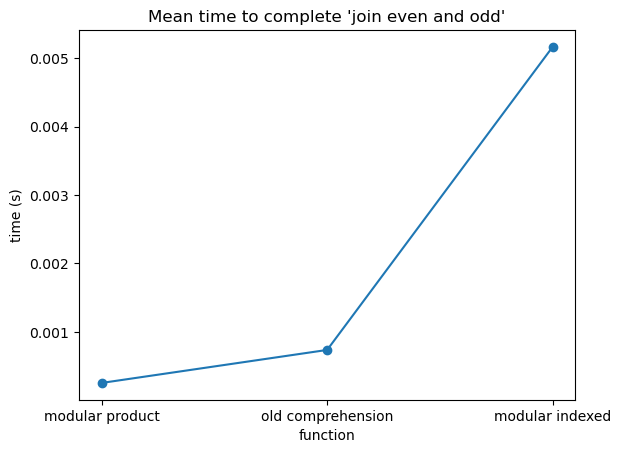

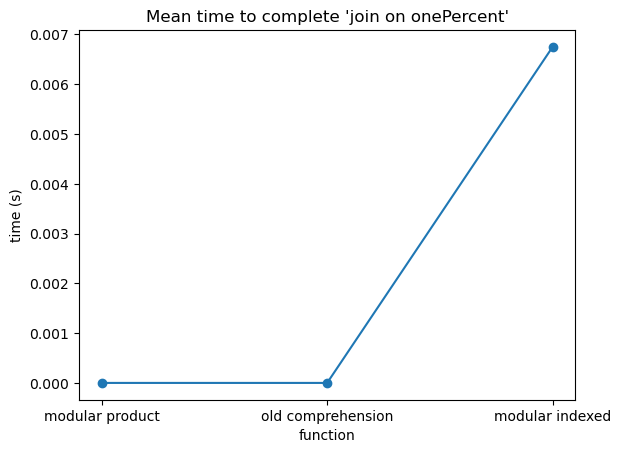

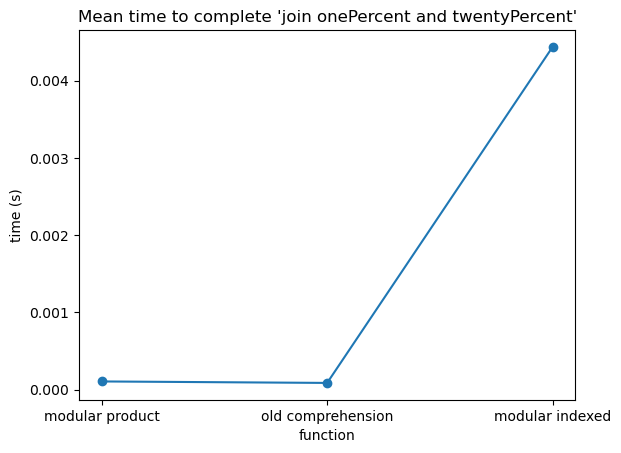

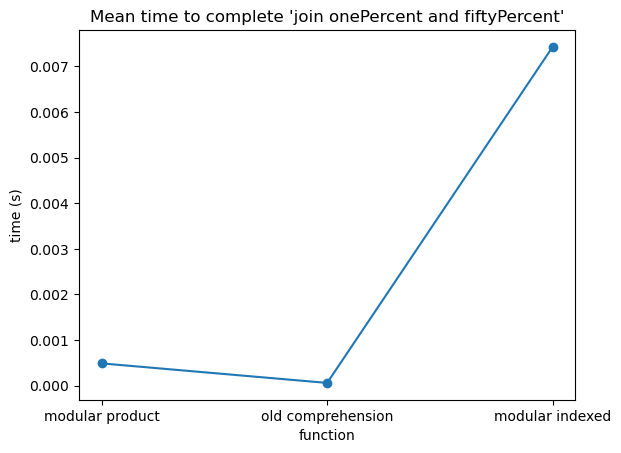

In [8]:
plotter = BenchmarkPlotter(data)
for group_name in group_names:
    fig, ax = plt.subplots()
    plotter.plot_benchmark_group_means(ax, group_name)
plt.show()